Import packages and set the directory to load data

In [1]:
# work with jl2815 environment
import xarray as xr # for netCDF4 
import pandas as pd
import numpy as np
from netCDF4 import Dataset
from matplotlib import pyplot as plt
import os
# Ignore warnings due to duplicated dimension names
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning, module="xarray")
from pathlib import Path

import sys
gems_tco_path = "/Users/joonwonlee/Documents/GEMS_TCO-1/src"
sys.path.append(gems_tco_path)

from GEMS_TCO import configuration as config
from GEMS_TCO import data_preprocess as dmbh

2024 01: hours: 00 to 05   N3035_E100110
2023 04: hours: 00 to 07   N3035_E100110
2023 01: hours: 00 to 05   N3035_E100110

2023: y23m04day20_8 and y23m07day13_8 missing !! for N3035_E100110
2023: y23m04day20_8 !! for N3035_E110120

2023 04: hours: 00 to 07   N3035_E110120           
2023 07: hours: 00 to 07   N3035_E110120
2024 04: hours: 00 to 07   N3035_E110120
2024 07: hours: 00 to 07   N3035_E110120

# Explore Groups in the NetCDF file

In [2]:
# file_path = "/Volumes/Backup Plus/GEMS_UNZIPPED/2024070131/20240701_0045.nc"  # portable device
file_path = "/Users/joonwonlee/Documents/GEMS_DATA/2024070131/20240701_0045.nc" # mac
location = xr.open_dataset(file_path, group='Geolocation Fields')
Z = xr.open_dataset(file_path, group='Data Fields')


import netCDF4 as nc

dataset = nc.Dataset(file_path)

# Print all group names
print("Groups in the NetCDF file:")
for group_name in dataset.groups:
    print(group_name)

# Optionally, print variables in each group
for group_name, group in dataset.groups.items():
    print(f"\nVariables in group '{group_name}':")
    for var_name in group.variables:
        print(var_name)

# Close the dataset
dataset.close()


Groups in the NetCDF file:
Data Fields
Geolocation Fields
METADATA

Variables in group 'Data Fields':
AveragingKernel
CloudPressure
ColumnAmountO3
DegreesOfFreedomForSignal
EstimatedError
FinalAlgorithmFlags
LayerEfficiency
Nvalue
O3BelowCloud
Reflectivity340
Reflectivity380
Residue
StepOneO3
StepTwoO3
TerrainPressure
dNdR
dR_dl
EffectiveCloudFraction

Variables in group 'Geolocation Fields':
Latitude
Longitude
RelativeAzimuthAngle
SolarZenithAngle
ViewingZenithAngle
Time
GroundPixelQualityFlags

Variables in group 'METADATA':


# Truncate the area of interest and save in csv

Extract the region of interest

In [3]:
computer_path = config.mac_data_load_path  # mac
# portable_disk = "/Volumes/Backup Plus/GEMS_UNZIPPED/" 
year=2024
month = 7
filelist_instance = dmbh.file_path_list(year, month, computer_path)
# filelist_instance = file_path_list(year, month, portable_disk)
file_paths_list = filelist_instance.file_names_july24() 


# instance= MonthAggregatedCSV(4.99, 10.01, 110.01, 123.01)
instance= dmbh.MonthAggregatedCSV(0, 5, 123, 133)
GoodQualityData = instance.aggregate_july24tocsv(file_paths_list)

check data quality

In [4]:
GoodQualityData.shape[0]/31/8  
# 5 10 123 133  33856 without filtering 0 only: 10759  fine list: 32063 
# 0 5 123 133 00 only  13520  33092 if 0|2|4|128

33092.709677419356

(array([8032227.,       0.,       0.,       0.,       0.,       0.,
              0.,       0.,       0.,  174765.]),
 array([  0.        ,  12.80000019,  25.60000038,  38.40000153,
         51.20000076,  64.        ,  76.80000305,  89.59999847,
        102.40000153, 115.19999695, 128.        ]),
 <BarContainer object of 10 artists>)

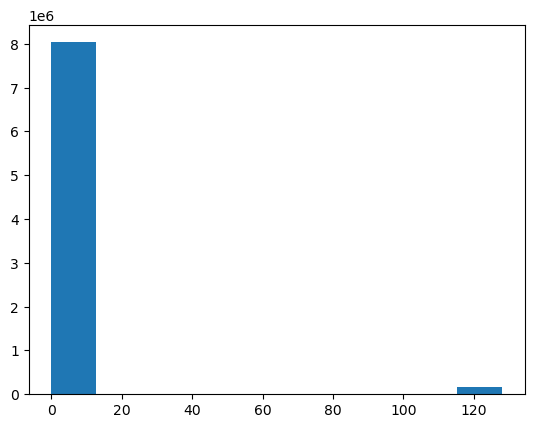

In [5]:
plt.hist( GoodQualityData['FinalAlgorithmFlags'])

save file

In [6]:
instance.save(GoodQualityData, 2024, 7, computer_path)

-observation 1: weird no matter how i truncated why there is consitent missing in some longitude range? (solved: when viewing angle is bad like E110, instrument go downward when moving from East to West)



### Make a loop to process multiple months


In [ ]:
year = 2024
portable_disk = "/Volumes/Backup Plus/GEMS_UNZIPPED/" 
for month in range(7, 8):  # From January to November
    # filelist_instance = file_path_list(year, month, computer_path)

    # truncate data and save in cvs
    filelist_instance = dmbh.file_path_list(year, month, portable_disk)
    file_paths_list = filelist_instance.file_names_july24() 

    # transform ORI dense data into pickle file
    instance= dmbh.MonthAggregatedCSV(0, 5, 123, 133)
    GoodQualityData = instance.aggregate_july24tocsv(file_paths_list)
    instance.save(GoodQualityData, year, month, computer_path)

### Transform CVS into pickle file after saving csv file into the folder

In [45]:

# input_base = "/Volumes/Backup Plus/Extracted_data/"       MAC: working from portable disk requires permission, figure out later
mac_data_path = config.mac_data_load_path   # "C:\\Users\\joonw\\TCO\\GEMS_data"    MSI notebook

lat_start, lat_end, lon_start, lon_end = 0, 5, 123, 133

years = [2024]  # years = [2023,2024]
months = list( range(7,8))

instance = dmbh.MonthAggregatedHashmap(lat_start, lat_end, lon_start, lon_end, years, months)
instance.aggregate_july24topickle(csvfilepath = mac_data_path)

Reading file: /Users/joonwonlee/Documents/GEMS_DATA/data_2024/data_24_07_0131_N05_E123133.csv
Successfully processed and saved data for year 24 month 07.
